# Homework 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In this homework, we will use the Car price dataset like last week. Download it from here.

Or you can do it with wget:

https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

We'll work with the MSRP variable, and we'll transform it to a classification task.

For the rest of the homework, you'll need to use only these columns:

    Make,
    Model,
    Year,
    Engine HP,
    Engine Cylinders,
    Transmission Type,
    Vehicle Style,
    highway MPG,
    city mpg
    MSRP


Data preparation

- Keep only the columns above
- Lowercase the column names and replace spaces with underscores
- Fill the missing values with 0
- Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df = df[['make','model','year','engine_hp','engine_cylinders','transmission_type','vehicle_style','highway_mpg','city_mpg','msrp']]
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [6]:
df.fillna(0, inplace=True)

In [7]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [8]:
df['above_average'] = (df.msrp >= df.msrp.mean()).astype(int)

In [9]:
del df['msrp']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [12]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [13]:
len(df_train),len(df_val), len(df_test)

(7148, 2383, 2383)

Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
for col in ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']:
    print(col, roc_auc_score(y_val, df_val[col]))

engine_hp 0.9153308465235073
engine_cylinders 0.7690689320336834
highway_mpg 0.37135711544209854
city_mpg 0.3300050585178542


Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

In [16]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [17]:
def train(df):
    dicts = df.to_dict(orient= 'records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear',C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [18]:
dv, model = train(df_train)

In [19]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X= dv.transform(dicts)

    y_pred= model.predict_proba(X)[:,1]

    return y_pred

In [20]:
y_pred = predict(df_val, dv, model)

In [21]:
roc_auc_score(y_val,y_pred)

0.9790336815928319

Question 3: Precision and Recall

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

In [22]:
thresholds = np.arange(0.0,1.0, step=0.01)
actual_positive = (y_val== 1)
actual_negative = (y_val== 0)

recall_score = []
precision_score = []

for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    TP = (predict_positive & actual_positive).sum()
    TN = (predict_negative & actual_negative).sum()

    FP = (predict_positive & actual_negative).sum()
    FN = (predict_negative & actual_positive).sum()

    precision_cm = TP / (TP + FP)
    recall_cm = TP / (TP + FN)

    precision_score.append(precision_cm)
    recall_score.append(recall_cm)

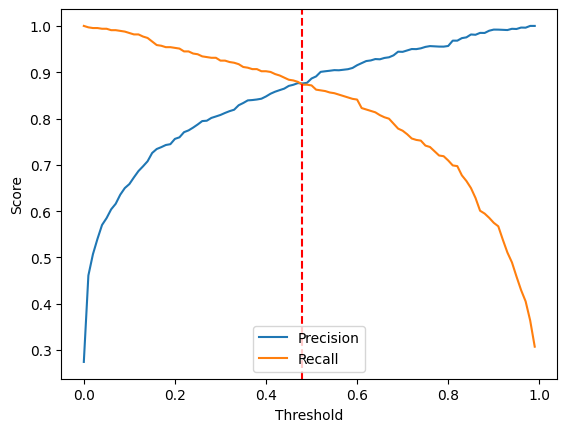

In [23]:
plt.plot(thresholds, precision_score, label='Precision')
plt.plot(thresholds, recall_score,label='Recall')
plt.axvline(0.48, color='r', linestyle= '--')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

Where is precision and

is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [24]:
f1_score = []
for i in range(len(precision_score)):
    f1 = 2 * precision_score[i]* recall_score[i] / ( precision_score[i] + recall_score[i])
    f1_score.append(f1)

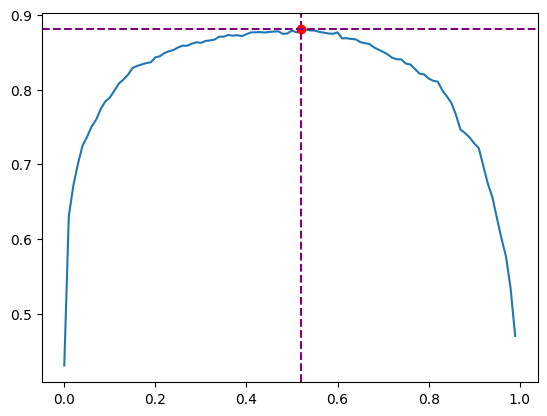

In [25]:
plt.plot(thresholds, f1_score,label='F1')
plt.axvline(0.52, linestyle= '--', color='purple')
plt.plot(thresholds[np.argmax(f1_score)],max(f1_score), marker='o', color='r')
plt.axhline(max(f1_score), linestyle= '--', color='purple')
plt.show()

Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

In [26]:
from sklearn.model_selection import KFold

In [27]:
KFold= KFold(n_splits=5, shuffle=True, random_state=1)

In [31]:
scores = []

for train_idx, val_idx in KFold.split(df_full_train):
        
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        del df_train['above_average']
        del df_val['above_average']

        dv, model  = train(df_train)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

In [33]:
print(f'mean score:{np.mean(scores)}, standard deviation:{np.std(scores)}')

mean score:0.9791040913033688, standard deviation:0.0027787629071375046


Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 0.5, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

In [34]:
def train_q6(df,y, C):
    dicts = df.to_dict(orient= 'records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear',C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [35]:
C = [0.01,0.1,1,10]
scores_q6 = []
for c in C:
    
    for train_idx, val_idx in KFold.split(df_full_train):
            
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train.above_average.values
            y_val = df_val.above_average.values
            
            del df_train['above_average']
            del df_val['above_average']

            dv, model  = train_q6(df_train, y_train,c)
            y_pred = predict(df_val, dv, model)

            auc = roc_auc_score(y_val, y_pred)
            scores_q6.append(auc)
            
    print(f"C: {c}, mean score: {round(np.mean(scores),4)}")

C: 0.01, mean score: 0.9791
C: 0.1, mean score: 0.9791
C: 1, mean score: 0.9791
C: 10, mean score: 0.9791
